In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
import seaborn as sns
import string

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

y = X_train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.25, random_state=42)

X_train.drop(['Survived'], axis=1)
X_val.drop('Survived', axis=1)

print(X_train.info())
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          536 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  223 non-null    int64  
 1  

Sex
[439 229]


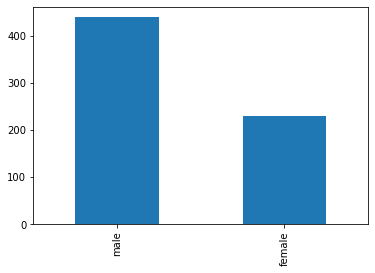

Ticket
[7 6 6 5 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1

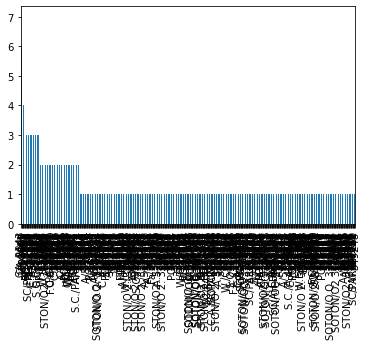

Cabin
[4 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


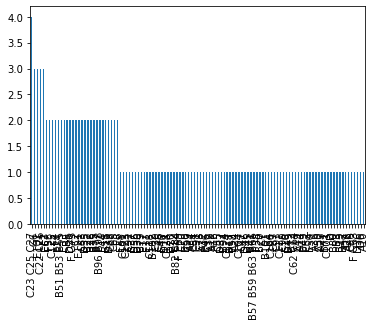

Embarked
[491 117  58]


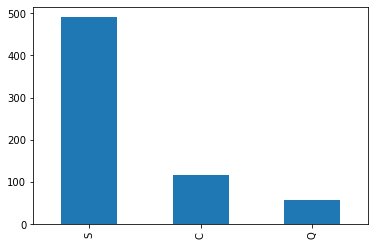

In [3]:
categorical_features = []

for c in X_train.columns:
    if X_train[c].dtype == 'object':
        categorical_features.append(c)
        
for cat_col in categorical_features:
    if cat_col == "Name":
        continue    
    cat_graph = X_train[cat_col].value_counts()
    print(cat_col)
    print(cat_graph.values)
    cat_graph.plot(kind='bar')
    plt.show()

In [4]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        try:
            if big_string.find(substring) != -1:
                return substring
        except AttributeError:
            return big_string
            
    return np.nan


title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

removed_X_train = X_train.copy()
removed_X_val = X_val.copy()

removed_X_train['Title']=X_train['Name'].map(lambda x: substrings_in_string(x, title_list))
removed_X_val['Title']=X_val['Name'].map(lambda x: substrings_in_string(x, title_list))


def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

removed_X_train['Title']=removed_X_train.apply(replace_titles, axis=1)
removed_X_val['Title']=removed_X_val.apply(replace_titles, axis=1)

cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

removed_X_train['Deck']=removed_X_train['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
removed_X_val['Deck']=removed_X_val['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))


print(removed_X_train.info())
print(removed_X_val.info())

print()
print()
print(removed_X_train['Deck'].value_counts())

deck_prob = removed_X_train['Deck'].value_counts()
deck_distribution = deck_prob/deck_prob.sum()
print(deck_distribution)

#Make Monte Carlo Sampling for filling in the gaps

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          536 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
 12  Title        668 non-null    object 
 13  Deck         149 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 78.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
--- 

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_['Age'].fillna(X_['Age'].mean(), inplace=True)
        X_['Age'] = X_['Age'].astype('int')
        return X_

class EmbarkTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_['Embarked'].fillna(X_['Embarked'].mode()[0], inplace=True)
        #x_ = X_['Embarked'].fillna(X_['Embarked'].mode(), inplace=True)
        #print(X_['Embarked'])
        X_['Embarked'] = X_['Embarked'].astype('object')
        return X_

class DeckTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        isnull = X_['Deck'].isnull()
        
        X_.loc[isnull, 'Deck'] = np.random.choice(deck_prob.index, p=deck_distribution.values)
        #size = len(X_[isnull])
        return X_
    
class TicketTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        def convert(string):
            newPrice = None
            for s in string.split():
                if s.isdigit():
                    return int(s)
            return np.nan
        X_ = X.copy()
        X_['Ticket'] = X_['Ticket'].map(lambda x: convert(x))
        
        X_['Ticket'].fillna(X_['Ticket'].mean(), inplace=True)
        
        return X_

In [6]:
fill_null_pipeline = Pipeline([
                        ('t1', AgeTransformer()),
                        ('t2', EmbarkTransformer()),
                        ('t3', DeckTransformer()),
                        ('t4', TicketTransformer())
])


null_free_X_train = fill_null_pipeline.fit_transform(removed_X_train)
null_free_X_val = fill_null_pipeline.transform(removed_X_val)

try:
    null_free_X_train = null_free_X_train.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    null_free_X_val = null_free_X_val.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
except:
    pass

print(null_free_X_train.info())
print(null_free_X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  668 non-null    int64  
 1   Pclass    668 non-null    int64  
 2   Sex       668 non-null    object 
 3   Age       668 non-null    int32  
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    float64
 7   Fare      668 non-null    float64
 8   Embarked  668 non-null    object 
 9   Title     668 non-null    object 
 10  Deck      668 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 60.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  223 non-null    int64  
 1   Pclass    223 non-null    int64  
 2   Sex       223 non-null    object 
 3   A

In [7]:
useful_cat_features = ['Sex', 'Embarked', 'Title', 'Deck']

encoded_X_train = null_free_X_train.copy()
encoded_X_val = null_free_X_val.copy()

for col in useful_cat_features:
    lb = LabelEncoder()
    
    lb.fit(encoded_X_train[col].values)
    encoded_X_train[col] = lb.transform(encoded_X_train[col])
    encoded_X_val[col] = lb.transform(encoded_X_val[col])
    
print(encoded_X_train.head(3))
print(y_train.head(3))

     Survived  Pclass  Sex  Age  SibSp  Parch    Ticket   Fare  Embarked  \
298         1       1    1   29      0      0   19988.0  30.50         2   
884         0       3    1   25      0      0  392076.0   7.05         2   
247         1       2    0   24      0      2  250649.0  14.50         2   

     Title  Deck  
298      2     2  
884      2     4  
247      3     4  
298    1
884    0
247    1
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

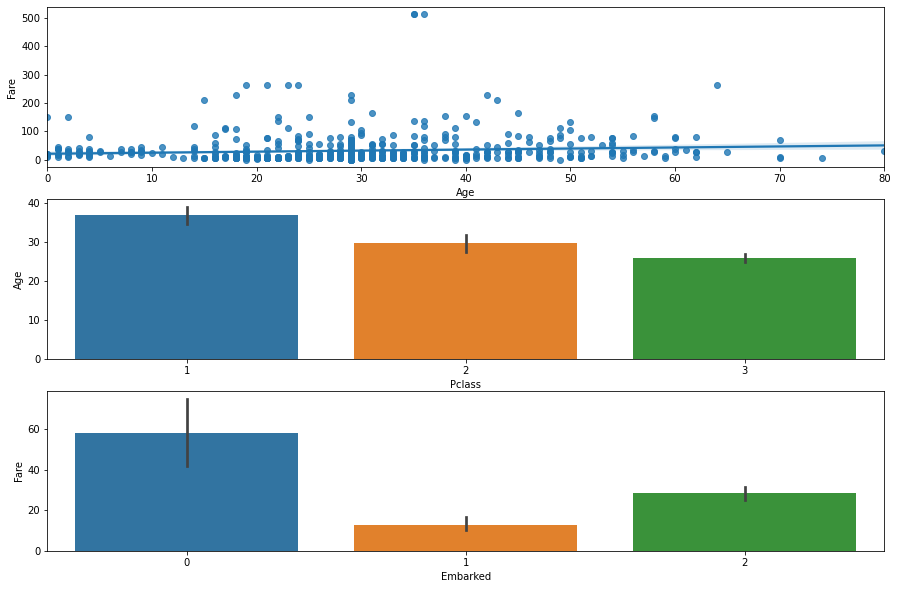

In [8]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

sns.regplot(x='Age',
           y='Fare',
            data=encoded_X_train,
           ax=ax1)

sns.barplot(x="Pclass",
           y="Age",
           data=encoded_X_train,
           ax=ax2)

sns.barplot(x='Embarked', 
            y='Fare', 
            data=encoded_X_train,
           ax=ax3)

Text(0.5, 1.0, 'Age Histogram')

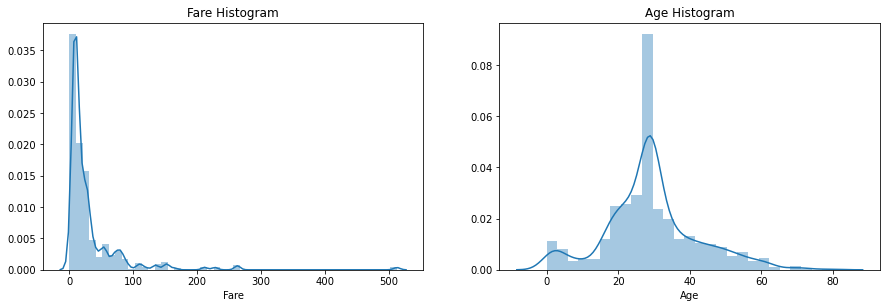

In [9]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

sns.distplot(encoded_X_train['Fare'], ax=ax1)
sns.distplot(encoded_X_train['Age'], ax=ax2)

ax1.set_title('Fare Histogram')
ax2.set_title('Age Histogram')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

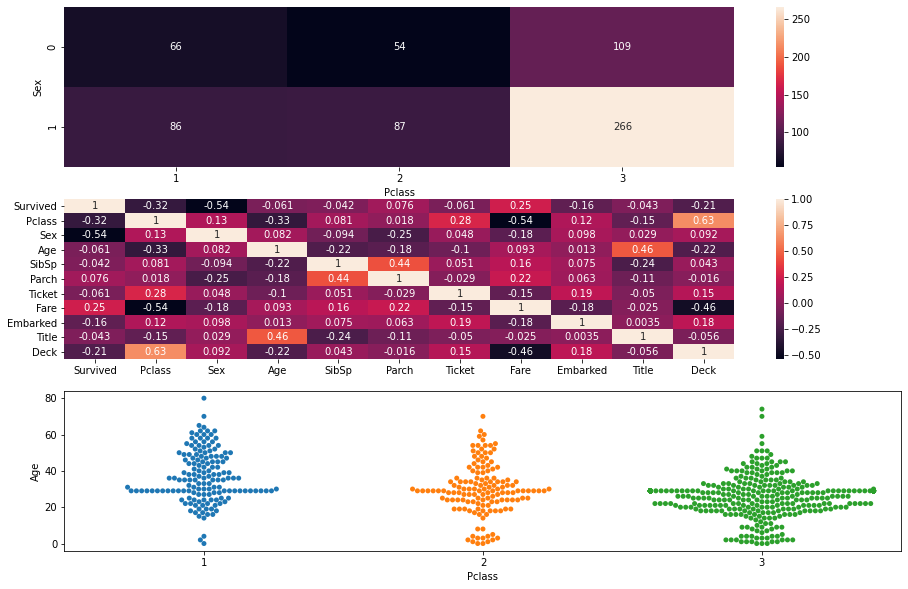

In [10]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

table = encoded_X_train.pivot_table(index=['Sex'], columns=['Pclass'], aggfunc='size')

sns.heatmap(table, 
           annot=True, fmt='d',
           ax=ax1)

sns.heatmap(encoded_X_train.corr(),
            annot=True,
           ax=ax2)

sns.swarmplot(x="Pclass",
             y="Age",
             data=encoded_X_train,
             ax=ax3)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

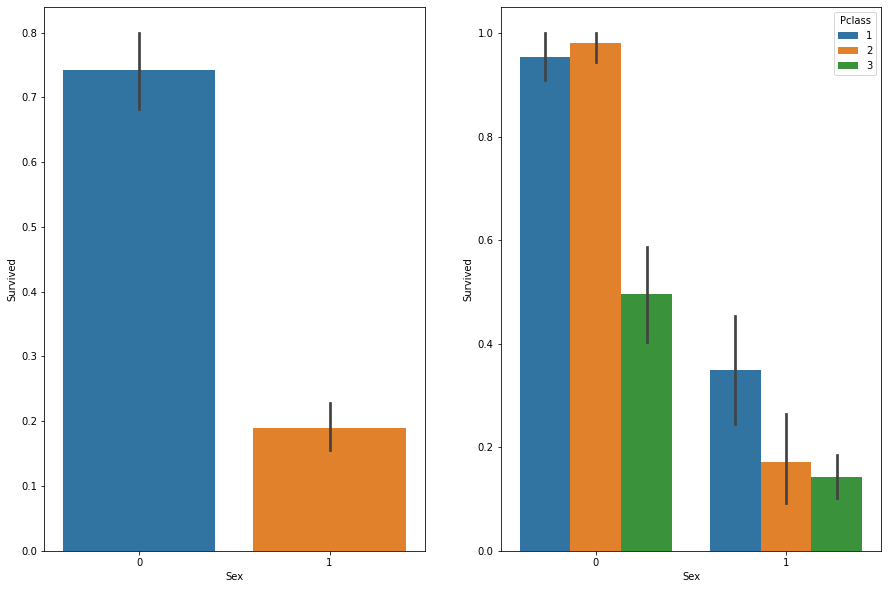

In [11]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(x="Sex", y="Survived", data=encoded_X_train, ax=ax1)
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=encoded_X_train, ax=ax2)

In [15]:
encoded_X_train['FamilySize'] = encoded_X_train['SibSp'] * encoded_X_train['Parch']
encoded_X_train['FarePerPerson'] = encoded_X_train['Fare']/(encoded_X_train['FamilySize']+1)
encoded_X_train['AgeClass'] = encoded_X_train['Age'] * encoded_X_train['Pclass']

encoded_X_val['FamilySize'] = encoded_X_val['SibSp'] * encoded_X_val['Parch']
encoded_X_val['FarePerPerson'] = encoded_X_val['Fare']/(encoded_X_val['FamilySize']+1)
encoded_X_val['AgeClass'] = encoded_X_val['Age'] * encoded_X_val['Pclass']

<AxesSubplot:>

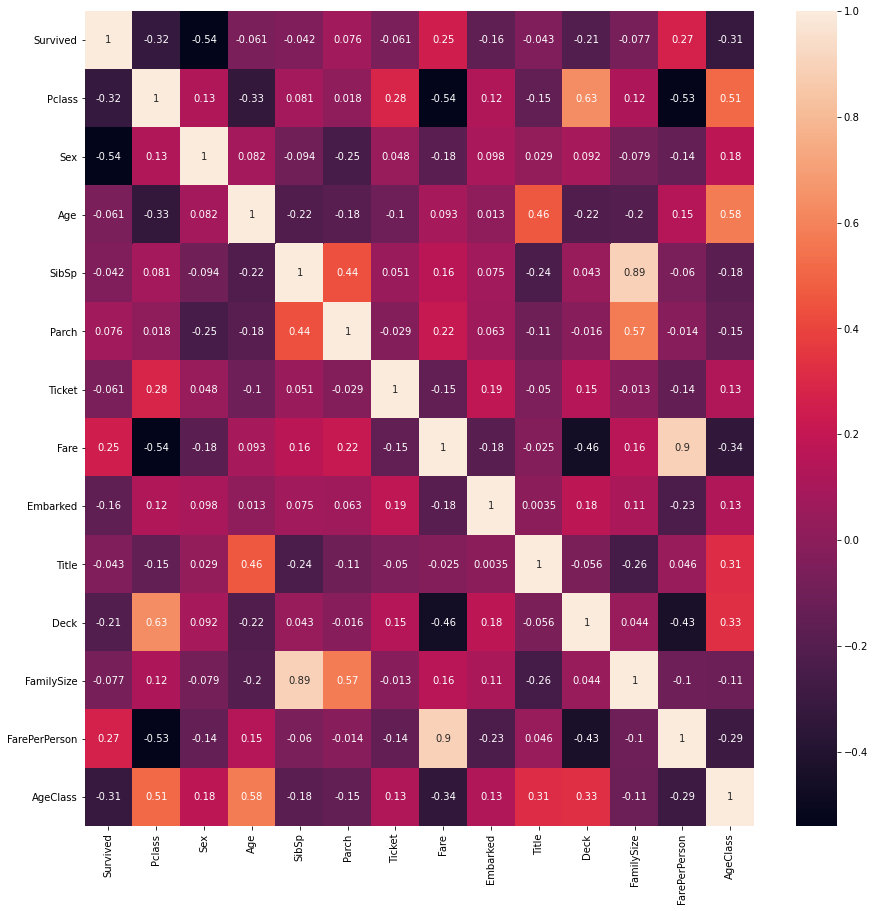

In [20]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(encoded_X_train.corr(), annot=True, ax=ax1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


rcf = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [37]:
rf_random = RandomizedSearchCV(estimator = rcf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(encoded_X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [44]:
from sklearn.metrics import accuracy_score

print(rf_random.best_params_)

base_model = RandomForestClassifier(n_estimators = 70,
                                    min_samples_split = 5,
                                    min_samples_leaf = 1,
                                    max_features = 'auto',
                                    bootstrap = True,
                                    random_state = 42)

base_model.fit(encoded_X_train, y_train)
prediction = base_model.predict(encoded_X_val)
print(accuracy_score(y_val, prediction))


{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
1.0


In [53]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(encoded_X_train, y_train)
prediction_svm = svm_clf.predict(encoded_X_val)
print(accuracy_score(y_val, prediction_svm))


0.600896860986547
